# Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python. This lecture will give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

Just as we use the np shorthand for NumPy we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [2]:
%matplotlib inline

## Plotting

The most important function in matplotlib is `plot`, which allows you to plot 2D data. Here is a simple example:

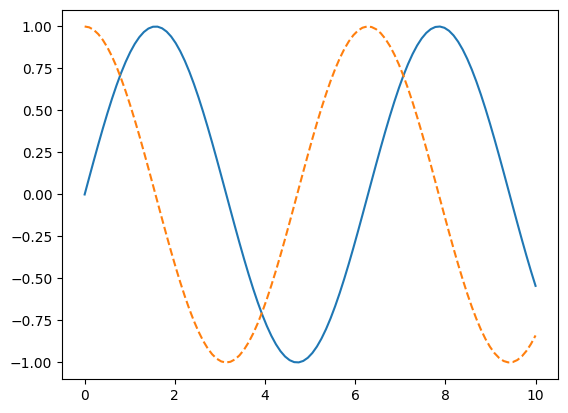

In [3]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Perhaps the simplest of all plots is the visualisation of a singular function $y=f(x)$. For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

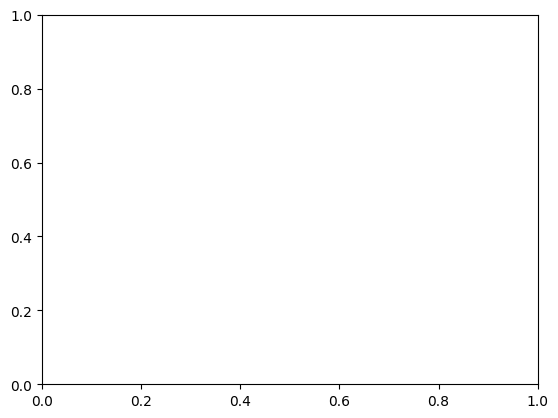

In [4]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* can be thought of as a single container that contains all the objects representing axes, graphics, text and labels. The *axes* is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualisation. Once we have created an axes, we can use the `ax.plt` function to plot some data. Let's start with a simple sinusoid:

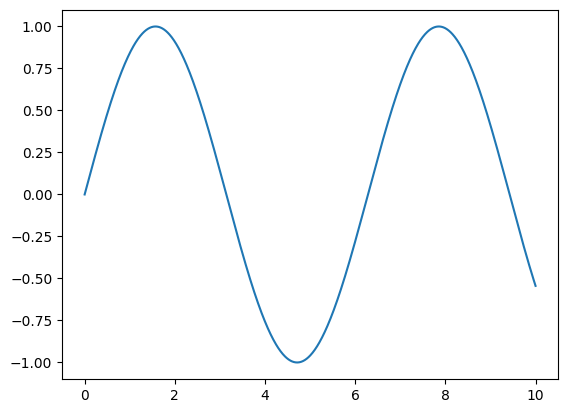

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background. This is the simplest way to create a plot.

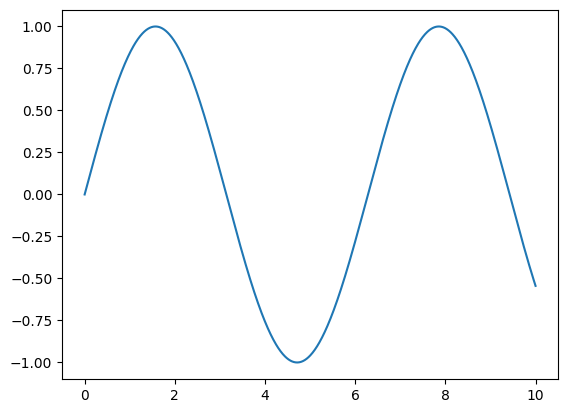

In [6]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times:

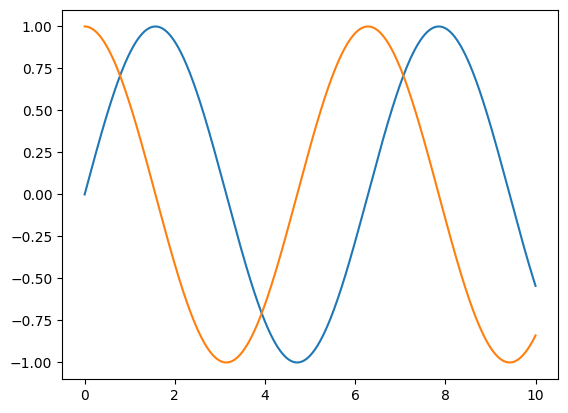

In [7]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Line Colors and Style

The first adjustment you might wish to make to a plot is to control the line colors and styles. The `plt.plot()` function takes additional arguments that can be used to specify these. To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways:

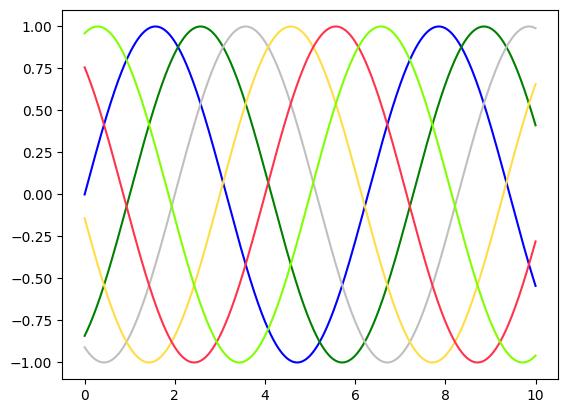

In [8]:
plt.plot(x, np.sin(x - 0), color='blue')          # specify color by name
plt.plot(x, np.sin(x - 1), color='g')             # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')          # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')       # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0, 0.2, 0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse');   # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines. 

Similarly, the line style can be adjusted using the `linestyle` keyword:

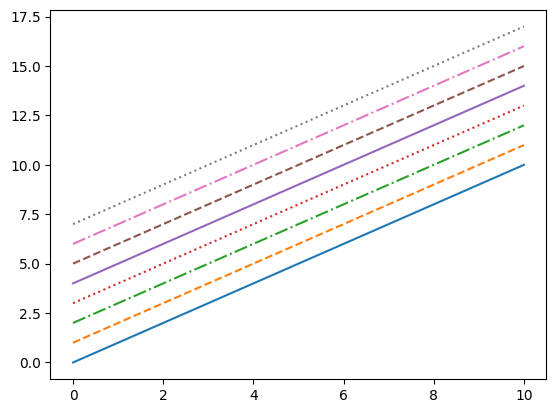

In [9]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the `plt.xlim()` and `plt.ylim()` methods:

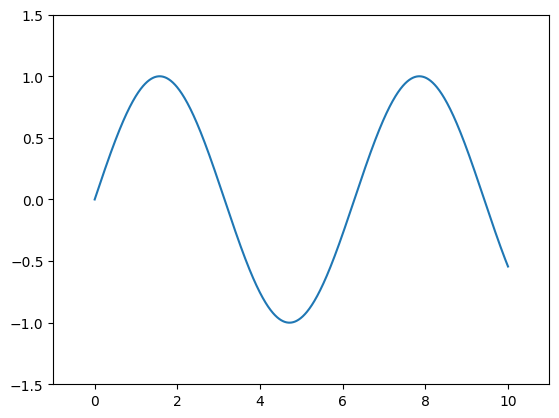

In [10]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Titles and axis labels are the simplest such labels — there are methods that can be used to quickly set them:

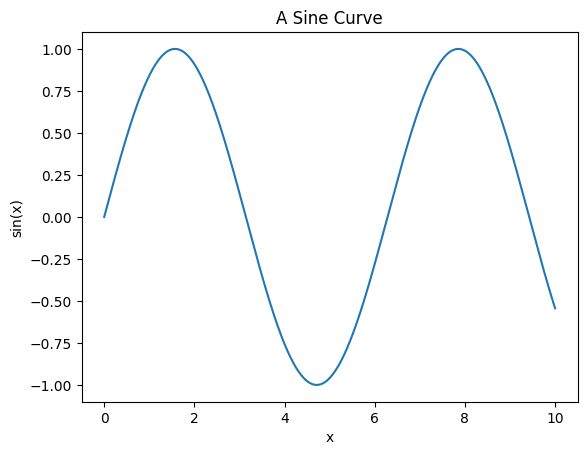

In [11]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function. For more information, see the Matplotlib documentation.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `plt.legend()` method:

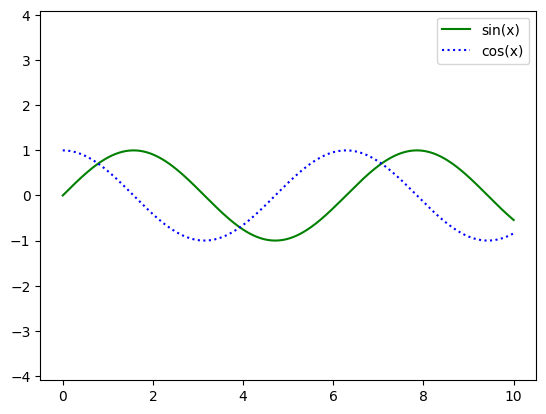

In [12]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Milestone: Simple Harmonic Motion

During your theory lecture you had a look into simple harmonic motion. We can now reproduce the result using NumPy and matplotlib, as below:


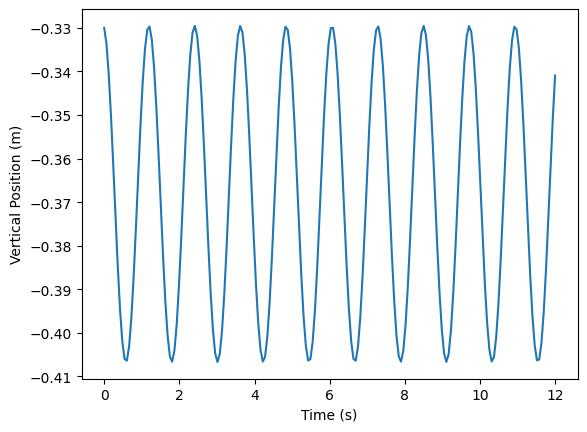

In [13]:
from matplotlib import pyplot as plt
import numpy as np

num_iterations = 200  # Number of iterations
dt = 0.06             # Time step
m = 0.2               # Mass
g = -9.81             # Gravity
k = 5.33

ball_position = np.zeros(num_iterations)
ball_momentum = np.zeros(num_iterations)
ball_position[0] = -0.33
ball_momentum[0] = 0

for i in range(1, num_iterations):
    F = m * g - (k * ball_position[i - 1])
    ball_momentum[i] = ball_momentum[i - 1] + F * dt
    ball_position[i] = ball_position[i - 1] + (ball_momentum[i] * dt) / m

plt.plot(np.linspace(0, num_iterations * dt, num_iterations), ball_position)
plt.xlabel('Time (s)')
plt.ylabel('Vertical Position (m)')
plt.show()

## Scatter plots

Another commonly used plot type is the simple scatter plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle or other shape. 

In the previous section we looked at `plt.plot`/`ax.plot` to produce line plots. It turns out that this same function can produce scatter plots as well:

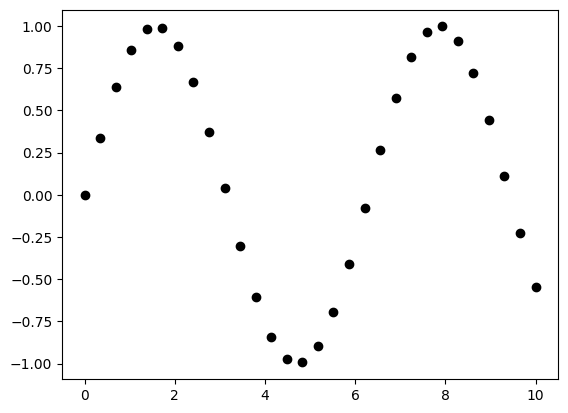

In [14]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as '-', '--' to control the line style, the marker style has its own set of short string codes. Examples of markers include:

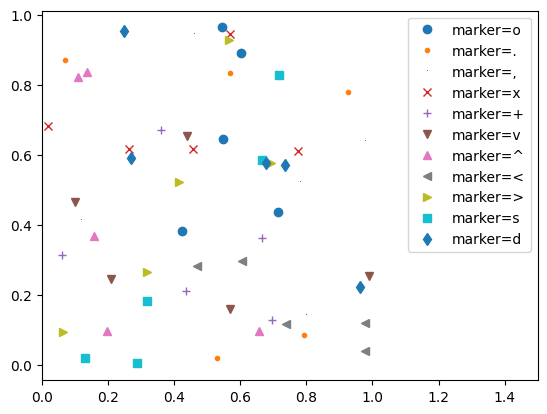

In [15]:
rng = np.random.RandomState(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,label=f"marker={marker}")

plt.legend()
plt.xlim(0, 1.5);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

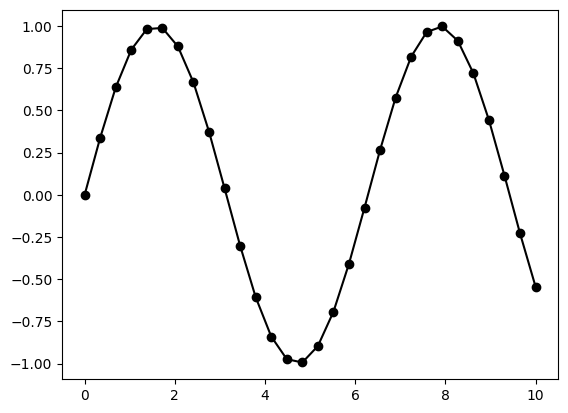

In [16]:
plt.plot(x, y, '-ok');

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function:

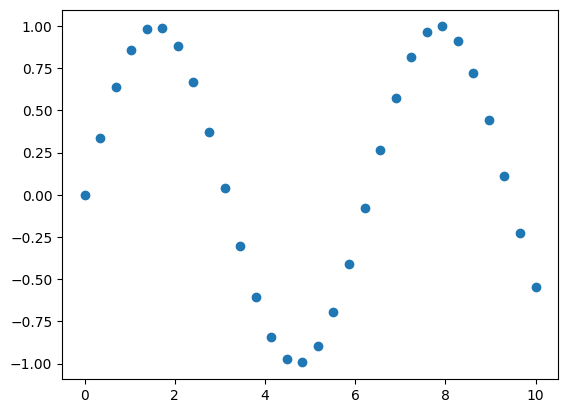

In [17]:
plt.scatter(x, y, marker='o')

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level:

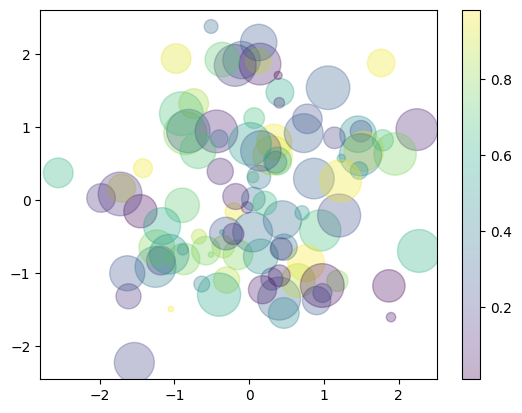

In [18]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the `colorbar()` command), and that the size argument is given in pixels. In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

Aside from the different features available in `plt.plot` and `plt.scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`. The reason is that `plt.scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plt.plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.

## Visualising Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe. I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 ± 2.5 (km/s)/Mpc, and my method has measured a value of 74 ± 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

A basic errorbar can be created with a single Matplotlib function call:

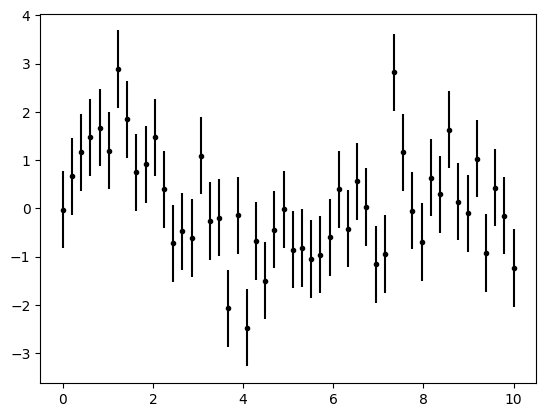

In [19]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in `plt.plot`. In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs. Using these additional options you can easily customize the aesthetics of your errorbar plot. For example, you can make the errorbars lighter than the points themselves:

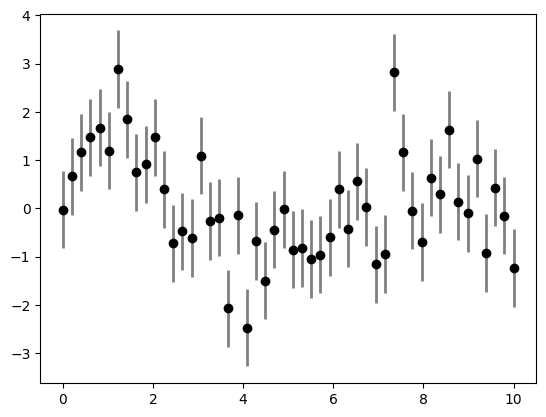

In [20]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='gray', elinewidth=2, capsize=0);

In addition to these options, you can also specify horizontal errorbars (xerr), one-sided errorbars, and many other variants. For more information on the options available, refer to the documentation of `plt.errorbar`.

## Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: `plt.contour` for contour plots, `plt.contourf` for filled contour plots, and `plt.imshow`for showing images.

We'll start by demonstrating a contour plot using a function $z=f(x,y)$, using the following particular choice for $f$. 

In [21]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour` function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid` function, which builds two-dimensional grids from one-dimensional arrays:

In [22]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

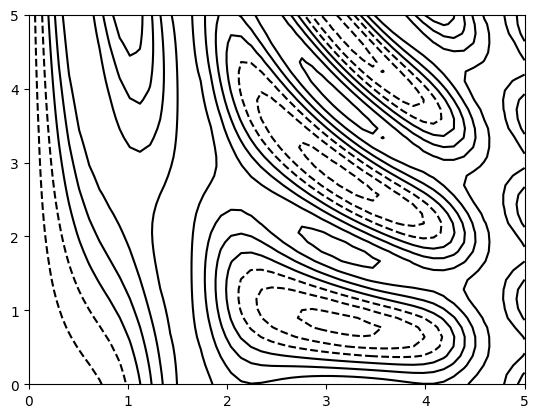

In [23]:
plt.contour(X, Y, Z, colors='black')

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines. Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument. Here, we'll also specify that we want more lines to be drawn — 20 equally spaced intervals within the data range:

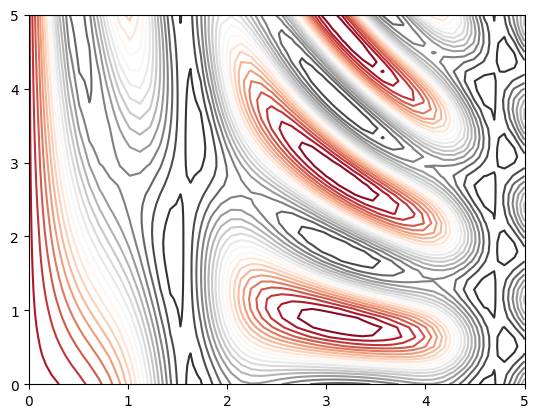

In [24]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

Our plot is looking nicer, but the spaces between the lines may be a bit distracting. We can change this by switching to a filled contour plot using the `plt.contourf()` function (notice the `f` at the end), which uses largely the same syntax as `plt.contour()`.

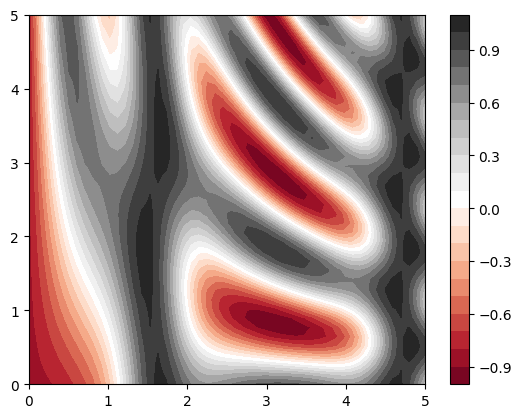

In [25]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the `plt.imshow()` function, which interprets a two-dimensional grid of data as an image.

The following code shows this:

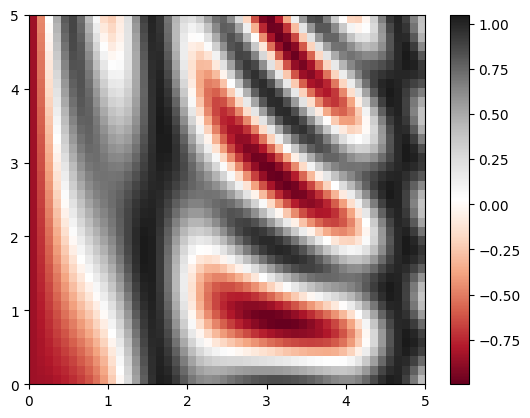

In [26]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', aspect='auto')
plt.colorbar()

There are a few potential gotchas with `imshow()`, however:
- `plt.imshow(`) doesn't accept an x and y grid, so you must manually specify the extent [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- `plt.imshow()` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- `plt.imshow()` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, by adding the `aspect='auto'` parameter, to make x and y units match.

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (with transparency set via the alpha parameter) and overplot contours with labels on the contours themselves (using the `plt.clabel()` function):

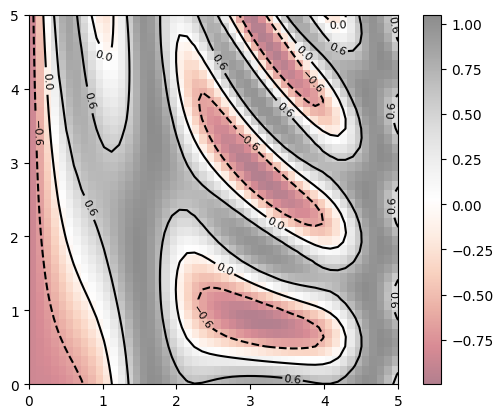

In [27]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',  cmap='RdGy', alpha=0.5)
plt.colorbar();

### Histograms, Binnings, and Density

A simple histogram can be a great step towards understanding a dataset:

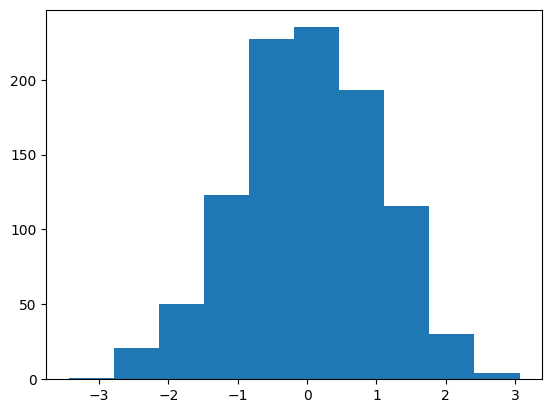

In [28]:
data = np.random.randn(1000)

plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here's are some examples of a more customized histogram:

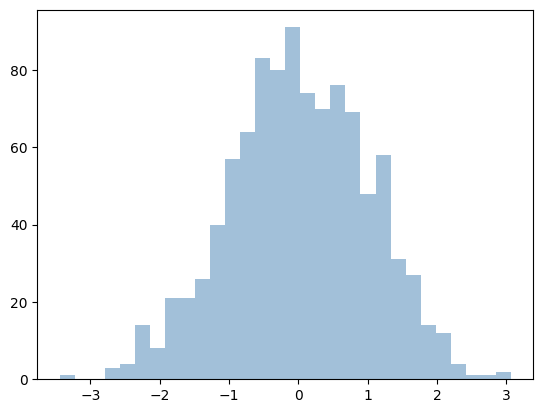

In [29]:
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

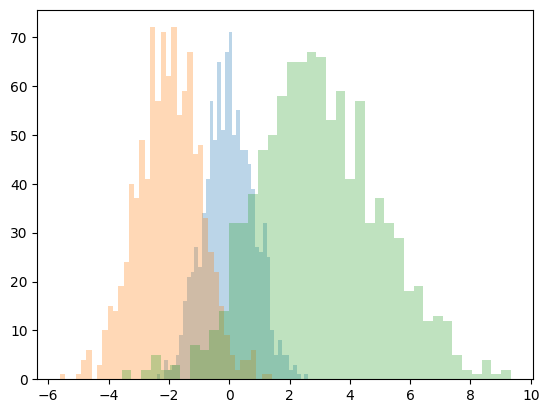

In [30]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. A straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function. First we define some data — an x and y array drawn from a multivariate Gaussian distribution, and then visualise it using this function.

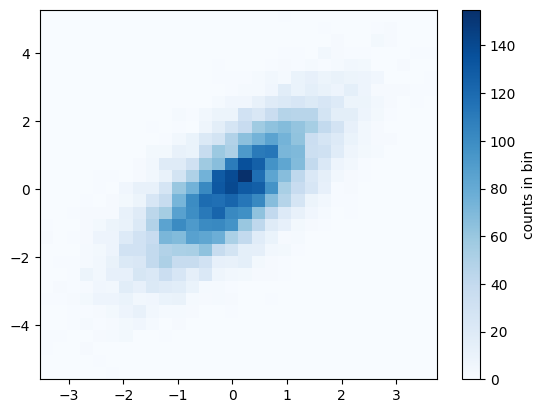

In [31]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. In this section we'll explore four routines for creating subplots in Matplotlib.

### Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `plt.subplot()`, which creates a single subplot within a grid. This command takes three integer arguments — the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

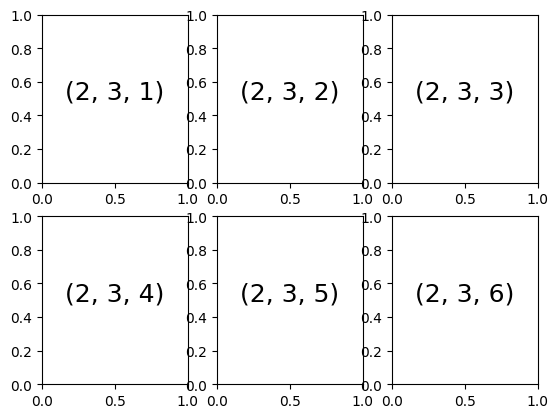

In [32]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots. The following code uses the equivalent object-oriented command, `fig.add_subplot()`:

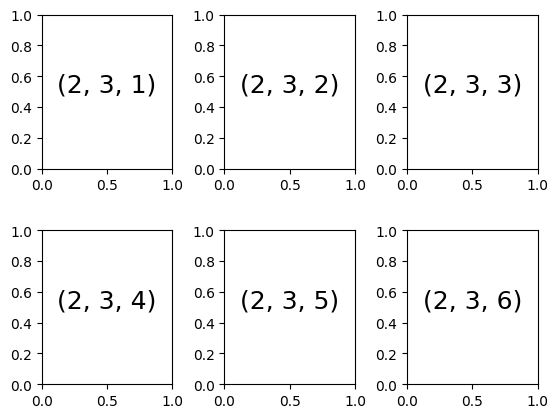

In [33]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

We've used the `hspace` and `wspace` arguments of `plt.subplots_adjust`, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

### The Whole Grid in One Go

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots. For this purpose, `plt.subplots()` is the easier tool to use (note the s at the end of subplots). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

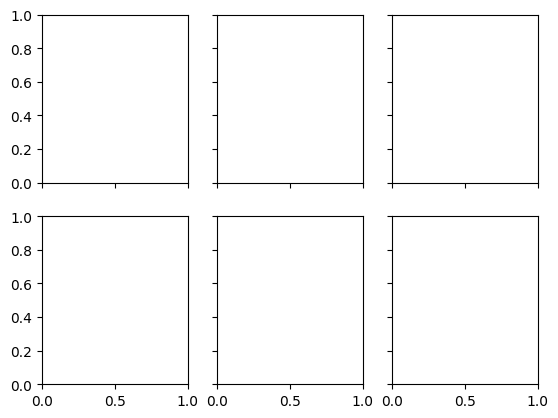

In [34]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

Note that by specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner. The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

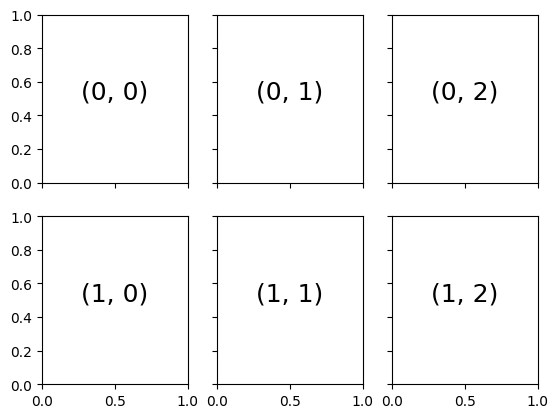

In [35]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

### More Complicated Arrangements

To go beyond a regular grid to subplots that span multiple rows and columns, `plt.GridSpec()` is the best tool. The `plt.GridSpec()` object does not create a plot by itself; it is simply a convenient interface that is recognized by the `plt.subplot()` command. For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

In [36]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

From this we can specify subplot locations and extents using the familiary Python slicing syntax:

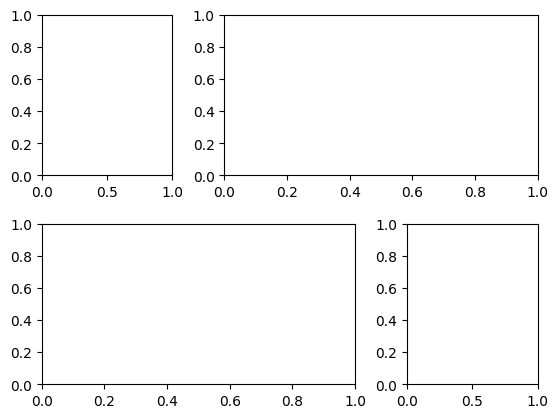

In [37]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

This type of flexible grid alignment has a wide range of uses, as shown in the example below:

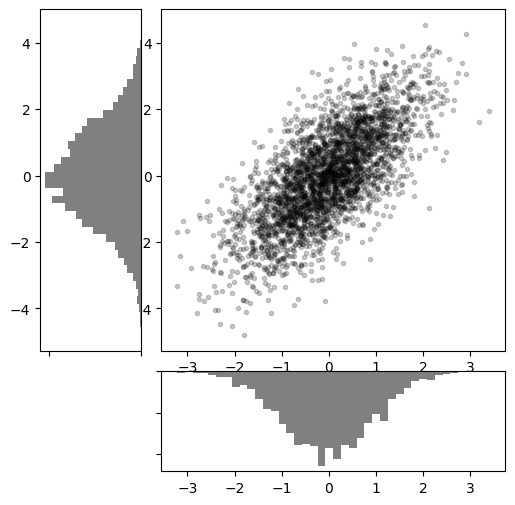

In [38]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Three-Dimensional Plotting

Matplotlib has limited three-dimensional plotting capabilities, which can be generated by using the `mpl_toolkits` module. Once this module is imported, a three-dimensional axes can be created by passing the keyword `projection='3d'` to any normal axes creation routine:

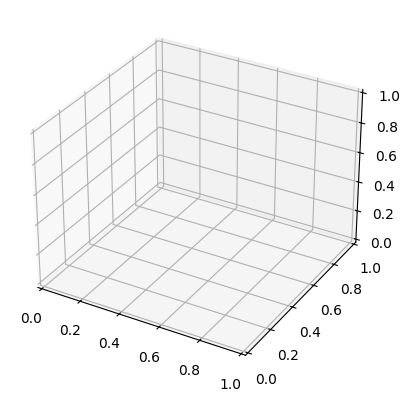

In [39]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the `ax.plot3D` and `ax.scatter3D` functions. The call signature for these is nearly identical to that of their two-dimensional counterparts. 

Here are some examples of 3D plots which can be generated with Matplotlib

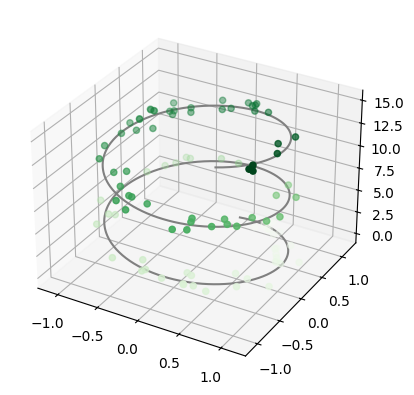

In [40]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

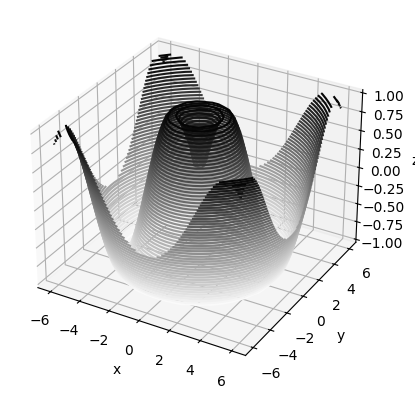

In [41]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

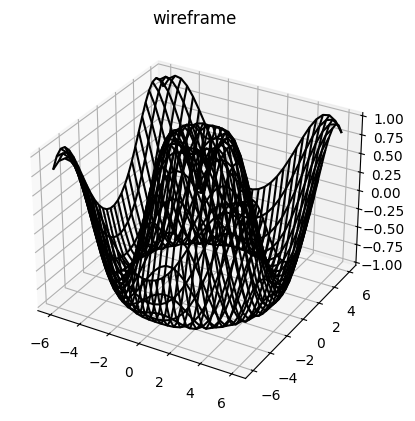

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

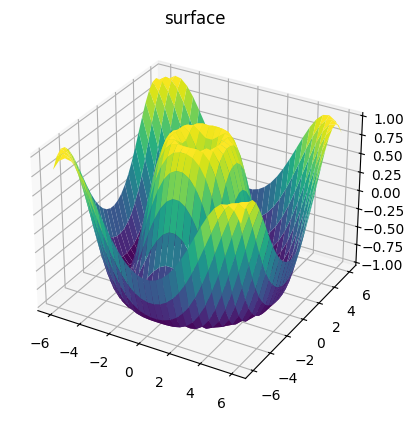

In [43]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

For a more thorough tutorial on Matplotlib, have a look at this online [tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)

***
##### You can now work out [worksheet 5](worksheets/worksheet_6.ipynb)

***
Back to [index](index.ipynb) page